[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Bolin_1958/timescales_comparison.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Bolin_1958/timescales_comparison.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Bolin_1958/timescales_comparison.ipynb)

#### Timescales comparison 
##### Bolin
##### Gedzelman

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PySDM.physics import si
from PySDM import Formulae
from PySDM_examples.Bolin_1958.common import *

In [3]:
any_non_zero_value = 44.0
radii = np.asarray([0.005, 0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.20]) * si.cm
temperature = Formulae().constants.T0 + 10 * si.K

variants = {
    'bolin': {
        'constants': {"BOLIN_ISOTOPE_TIMESCALE_COEFF_C1": 1.63},
        'isotope_relaxation_timescale': "Bolin1958",
    },
    'miyake': {
        'isotope_relaxation_timescale': "MiyakeEtAl1968",
    }
}

adjustment_time = {}
for variant, kwargs in variants.items():
    formulae = Formulae(
        terminal_velocity="RogersYau",
        drop_growth="Mason1951",
        diffusion_thermics="Neglect",
        saturation_vapour_pressure="AugustRocheMagnus",
        ventilation="Froessling1938",
        particle_shape_and_density="LiquidSpheres",
        air_dynamic_viscosity="ZografosEtAl1987",
        **kwargs,
    )
    v_term = formulae.terminal_velocity.v_term(radii)
    r_dr_dt = r_dr_dt_fun(v_term=v_term, radii=radii, temperature=temperature, formulae=formulae, K=any_non_zero_value)
    adjustment_time[variant] = formulae.isotope_relaxation_timescale.tau_of_rdrdt(
        radius = radii,
        r_dr_dt = r_dr_dt(RH=0, RH_eq=1, lv=0),
        alpha=1
    )

In [4]:
adjustment_time

{'bolin': array([  1.72419512,   5.36745707,  20.1452855 ,  48.3736625 ,
         80.67515855, 119.02306085, 204.18823681, 297.99430427]),
 'miyake': array([  2.81043805,   8.74895503,  32.83681537,  78.84906987,
        131.50050844, 194.00758919, 332.82682601, 485.73071595])}

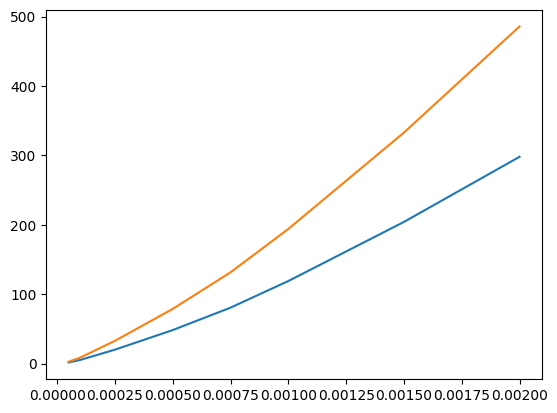

In [5]:
fig, ax = plt.subplots()
ax.plot(radii, adjustment_time["bolin"])
ax.plot(radii, adjustment_time["miyake"])
